# TP 5 : Courbes d'interpolation

L'objectif de ce TP est de programmer le calcul et le tracé de l'interpolation de Catmull-Rom.

## 1. Représentation informatique et tracé des polynômes

On choisit de représenter un polynôme de degré $n$ par la liste de ses $n+1$ coefficients. Par exemple, le polynôme $X^3-X^2+3$ est représenté par la liste `[3,0,-1,1]`.

- Ecrire une fonction `evalpoly` qui prend en paramètres un polynôme `P` et un nombre flottant `x` et renvoie la valeur en `x` du polynôme `P`. Essayer de minimiser le nombre de multiplications effectuées par la fonction (une puissance $n$-ième compte pour $n-1$ multiplications).

In [1]:
def eval_poly(P: list, x: float):
    if len(P) == 1:
        return P[0]
    return P[0] + eval_poly(P[1:], x) * x

- Combien de multiplications effectue la fonction `evalpoly` pour évaluer un polynôme de degré $n$ ?

*La fonction `eval_poly` effectue $n$ multiplications pour un polygone de degré $n$.*

- Ecrire une fonction `drawpoly` qui prend en paramètres un polynôme `P`, deux nombres flottants `x0` et `x1`, un entier `N`, et qui trace la représentation graphique de ce polynôme sur l'intervalle $[x_0,x_1]$ avec la commande `plot` du module `matplotlib.pyplot` en utilisant `N` points intermédiaires. On définira une valeur par défaut pour `N`.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def draw_poly(P: list, x0: float, x1: float, N: int):
    x = list()
    y = list()
    for i in np.arange(x0, x1 + (x1 - x0) / N, (x1 - x0) / N):
        x.append(i)
        y.append(eval_poly(P, i))
    plt.plot(x, y)
    plt.show()

- Tracer la représentation graphique du polynôme $ 2X^3 - X +1$ sur l'intervalle $[-1,1]$.

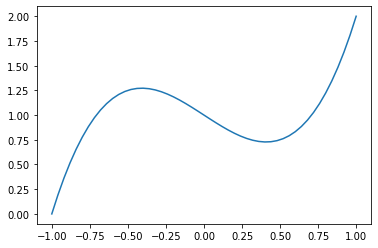

In [3]:
draw_poly([1, -1, 0, 2], -1, 1, 50)

## 2. Calcul de l'interpolation de Hermite

Une façon de calculer le polynôme d'interpolation de Hermite consiste à résoudre un système linéaire 4 x 4 (voir TD). Pour effectuer cette résolution on propose d'utiliser la commande `linalg.solve` du paquet `numpy`. Voici un exemple d'utilisation de cette commande. On notera que la solution renvoyée par cette commande n'est pas un objet de type `list` mais un objet de type `array`. Pour l'utilisation qui en est faite ici, cela ne change rien.

In [4]:
A = [[3,1], [1,2]]
B = [-1,2]
np.linalg.solve(A, B)

array([-0.8,  1.4])

- Ecrire une fonction `interpolHermite` qui prend en paramètres 6 valeurs `x0`, `x1`, `y0`, `y1`, `d0`, `d1`, et renvoie le polynôme d'interpolation de Hermite tel que

$$P(x_0)=y_0,\quad P'(x_0)=d_0,\quad P(x_{1})=y_{1}, \quad P'(x_{1})=d_{1}.$$

In [5]:
def interpol_Hermite(x0: float, x1: float, y0: float, y1: float, d0: float, d1: float):
    A = [[1, x0, x0 ** 2, x0 ** 3],
         [0, 1, 2 * x0, 3 * x0 ** 2],
         [1, x1, x1 ** 2, x1 ** 3],
         [0, 1, 2 * x1, 3 * x1 ** 2]]
    B = [y0, d0, y1, d1]
    return list(np.linalg.solve(A, B))

- A l'aide des fonctions `interpolHermite` et `drawpoly`, calculer puis tracer sur $[0,2]$ le polynôme d'interpolation de Hermite $P$ tel que

$$P(0)=1,\quad P'(0)=0,\quad P(2)=0, \quad P'(2)=1.$$

[1.0, 0.0, -1.25, 0.5]


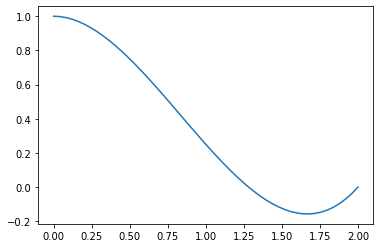

In [6]:
P = interpol_Hermite(0, 2, 1, 0, 0, 1)
print(P)
draw_poly(P, 0, 2, 50)

## 3. Calcul et tracé de l'interpolation de Catmull-Rom

- Ecrire une fonction `interpolCR` qui calcule l'interpolation de Catmull-Rom. Cette fonction prendra en paramètres `x`, la liste des abscisses des points, et `y`, la liste des ordonnées. Cette fonction renverra la liste des polynômes formant l'interpolation.

In [7]:
def interpol_CR(x: list, y: list):
    result = list()
    d = list()
    for i in range(len(x)):
        if i == 0:
            d.append((y[i + 1] - y[i]) / (x[i + 1] - x[i]))
        elif i == len(x) - 1:
            d.append((y[i] - y[i - 1]) / (x[i] - x[i - 1]))
        else:
            d.append((y[i + 1] - y[i - 1]) / (x[i + 1] - x[i - 1]))
    return [interpol_Hermite(x[i - 1], x[i], y[i - 1], y[i], d[i - 1], d[i]) for i in range(1, len(x))]
        

- Calculer l'interpolation de Catmull-Rom passant par les points $(0,1)$, $(1,0.5)$, $(3,-2)$, $(5,2)$, $(6,4)$ et $(9,0)$.

In [8]:
interpol_CR([0, 1, 3, 5, 6, 9], [1, .5, -2, 2, 4, 0])

[[1.0, -0.5, 0.5, -0.5],
 [-0.03125, 2.53125, -2.46875, 0.46875],
 [22.46875, -20.34375, 5.28125, -0.40625],
 [367.0, -210.5, 40.0, -2.5],
 [-33.00000000000008,
  16.166666666666696,
  -2.2222222222222263,
  0.09259259259259278]]

- Ecrire une fonction `drawinterpol` Cette fonction prendra en paramètres `x`, la liste, et `interpol`, la liste des polynômes formant l'interpolation.

In [9]:
def draw_interpol(x: list, interpol: list):
    step = .1 / (x[-1] - x[0])
    for i, P in enumerate(interpol):
        x_plot = list()
        y_plot = list()
        for n in np.arange(x[i], x[i + 1] + step, step):
            x_plot.append(n)
            y_plot.append(eval_poly(P, n))
        plt.plot(x_plot, y_plot)
    plt.show()

- Tracer l'interpolation de Catmull-Rom passant par les points $(0,1)$, $(1,0.5)$, $(3,-2)$, $(5,2)$, $(6,4)$ et $(9,0)$.

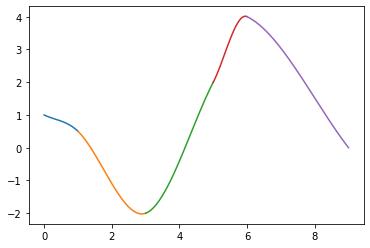

In [10]:
draw_interpol([0, 1, 3, 5, 6, 9], interpol_CR([0, 1, 3, 5, 6, 9], [1, .5, -2, 2, 4, 0]))

## 4. Tracé interactif de l'interpolation de Catmull-Rom

Le code suivant permet de tracer une ligne brisée de manière interactive : un clic gauche ajoute un point au tracé, un clic droit marque le point final du tracé.

<IPython.core.display.Javascript object>


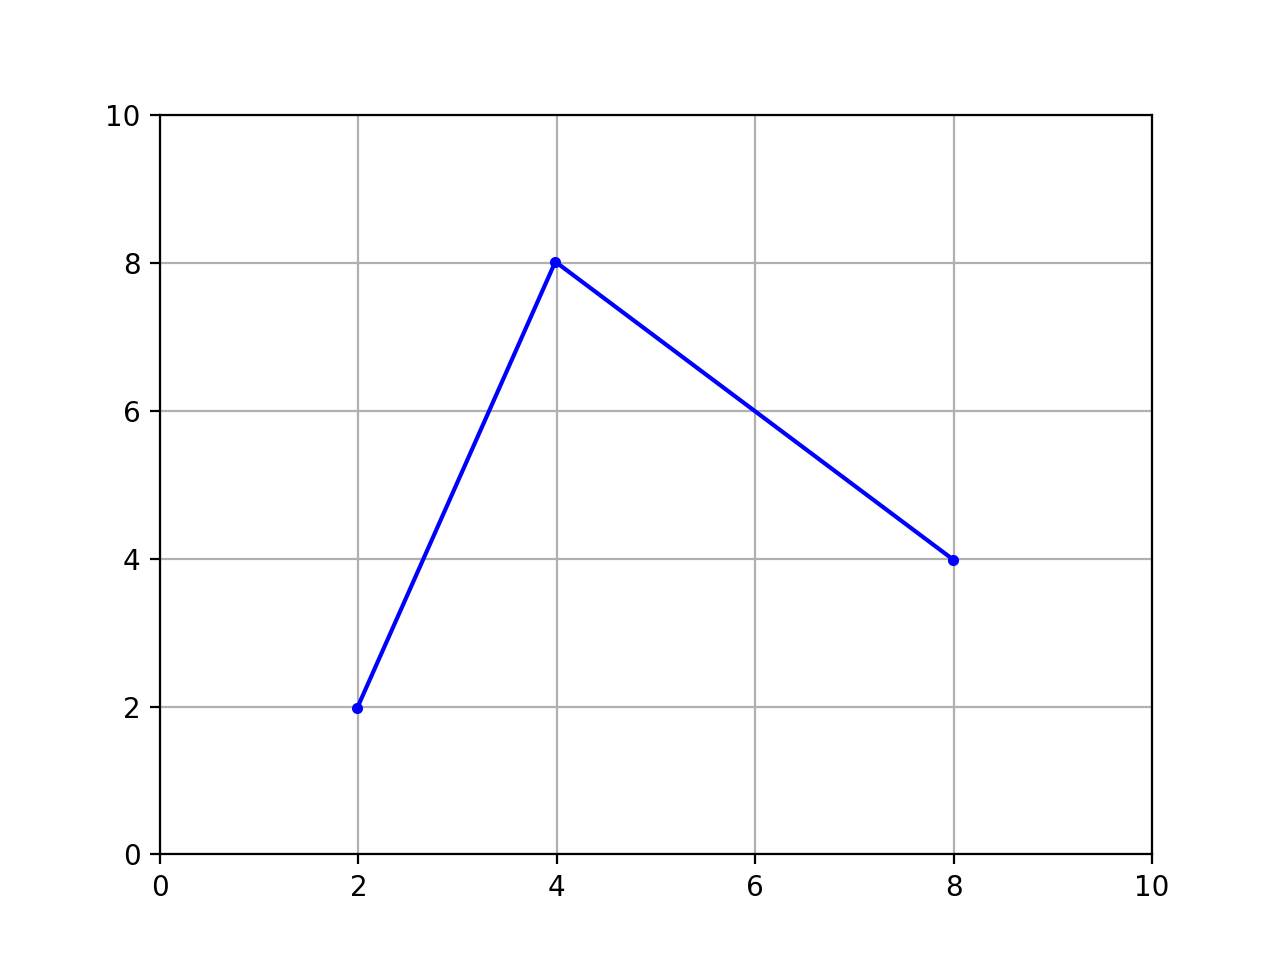

7

In [11]:
import matplotlib.pyplot as plt

def onclick(event):
    if event.button==1: #left click
        x0,y0 = event.xdata,event.ydata
        x.append(x0)  
        y.append(y0)
        plt.plot(x0,y0,'b.') 
    elif event.button==3: #right click
        x0,y0 = event.xdata,event.ydata
        x.append(x0)  
        y.append(y0)
        plt.plot(x0,y0,'b.') 
        plt.plot(x,y,color="blue")

x=[]
y=[]

%matplotlib notebook 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.grid(True)   
fig.canvas.mpl_connect('button_press_event', onclick)

- En s'inspirant du code ci-dessus, écrire un code qui permet de tracer de manière interactive l'interpolation de Catmull-Rom.

<IPython.core.display.Javascript object>


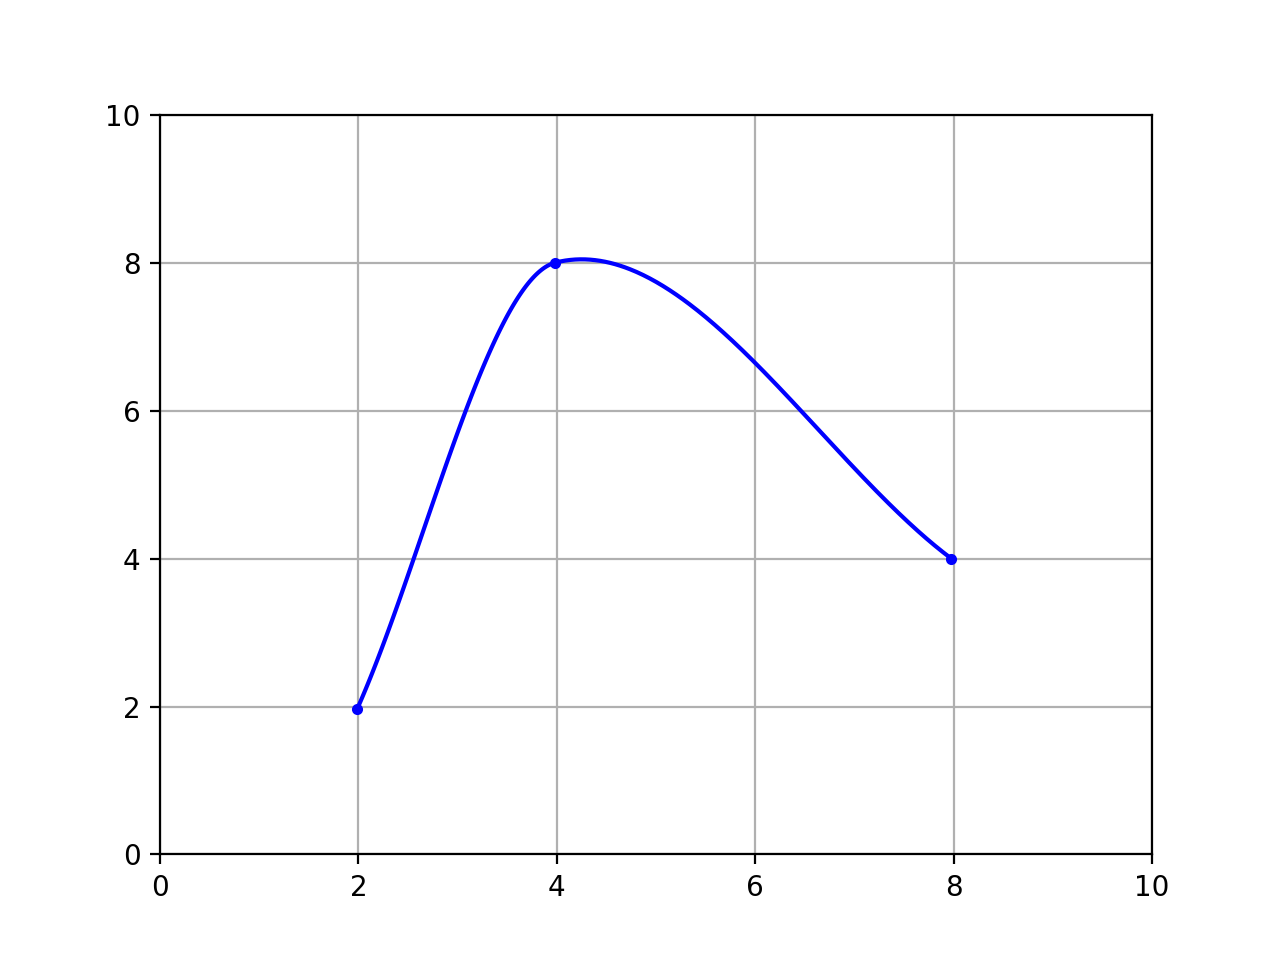

7

In [12]:
def onclick(event):
    if event.button==1: #left click
        x0,y0 = event.xdata,event.ydata
        x.append(x0)  
        y.append(y0)
        plt.plot(x0,y0,'b.') 
    elif event.button==3: #right click
        x0,y0 = event.xdata,event.ydata
        x.append(x0)  
        y.append(y0)
        plt.plot(x0,y0,'b.') 
        step = .1 / (x[-1] - x[0])
        interpol = interpol_CR(x, y)
        for i, P in enumerate(interpol):
            x_plot = list()
            y_plot = list()
            for n in np.arange(x[i], x[i + 1] + step, step):
                x_plot.append(n)
                y_plot.append(eval_poly(P, n))
            plt.plot(x_plot, y_plot, c="blue")
            
x=[]
y=[]

%matplotlib notebook 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.grid(True)   
fig.canvas.mpl_connect('button_press_event', onclick)